# Task 3 – Exploratory Analysis (Python)

## 1. Data Understanding & Cleaning
- Load the datasets
- Handle missing values or outliers if necessary

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_events = pd.read_csv('../data/events.csv')
df_devices = pd.read_csv('../data/devices.csv')
df_users = pd.read_csv('../data/users.csv')

## 2. Visualizations
Produce at least 3 meaningful charts, such as:
- Event volume over time
- Events per device or per user
- Comparison between Ayla vs Tuya devices
- Highlight any anomalies or interesting patterns

In [2]:
# Event volume over time

# First we need to convert timestamp to datetime
df_events['event_ts'] = pd.to_datetime(df_events['event_ts'])

# then merge tables events and devices because we need device_type
df = df_events.merge(df_devices, on='device_id', how='left')
# and merge above df with users because we need user info
df = df.merge(df_users, on='user_id', how='left')

df.head(5)

,event_id,device_id,event_type,event_value,event_ts,payload,user_id,network,device_type,firmware_version,location,signup_date,region,platform
0,e_0,d_87cfe321,telemetry,see_payload,2024-01-18 17:45:43+00:00,"{""metadata"": {""oem_model"": ""door_sensor"", ""dsn...",NaN,ayla,door_sensor,2.1.0,Home,NaN,NaN,NaN
1,e_1,d_fddd9d33,telemetry,see_payload,2024-02-04 16:18:19+00:00,"{""metadata"": {""oem_model"": ""window_sensor"", ""d...",33b1ad0b,ayla,window_sensor,3.5.beta,Cottage,2023-01-23,CA,Web
2,e_2,d_c5859fb6,telemetry,see_payload,2024-01-12 10:57:04+00:00,"{""status"": [{""code"": ""generic_state"", ""value"":...",2386e2a0,tuya,heater,2.1.0,Cottage,2023-01-18,USA,Android
3,e_3,d_de3f2763,telemetry,see_payload,2024-01-02 08:09:18+00:00,"{""status"": [{""code"": ""switch_led"", ""value"": fa...",1bc42251,tuya,smart_bulb,1.0.0,Cottage,2023-03-03,Canada,Web
4,e_4,d_8406c179,telemetry,see_payload,2024-01-23 01:15:16+00:00,"{""status"": [{""code"": ""generic_state"", ""value"":...",5d06a59a,tuya,heater,3.5.beta,Home,2023-12-28,can,Android


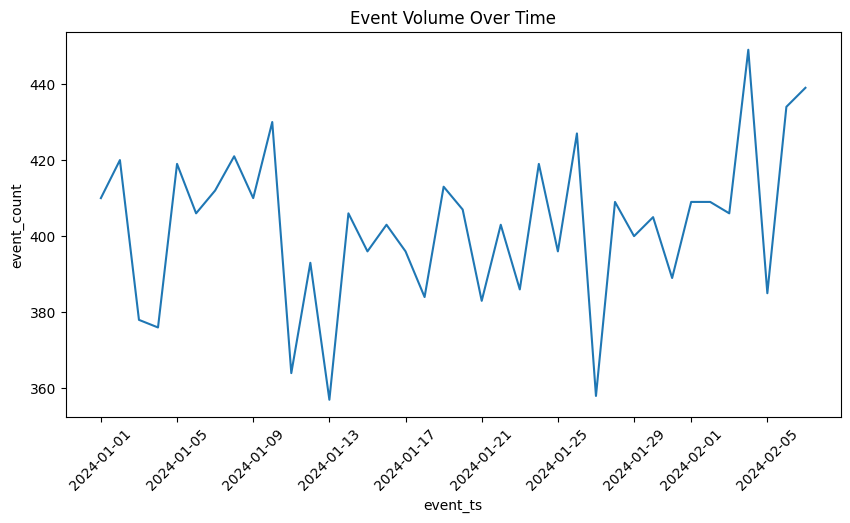

In [3]:
# Event Volume Over Time
events_per_day = (
    df.groupby(df['event_ts'].dt.date)   # extract date from date-time and group by applys
      .size()                            # like count() - counts how many rows (events) are in each group (date)
      .reset_index(name='event_count')   # prepare index for y_axe
)

# drawing
plt.figure(figsize=(10,5))
sns.lineplot(data=events_per_day, x='event_ts', y='event_count')
plt.title('Event Volume Over Time')
plt.xticks(rotation=45)
plt.show()

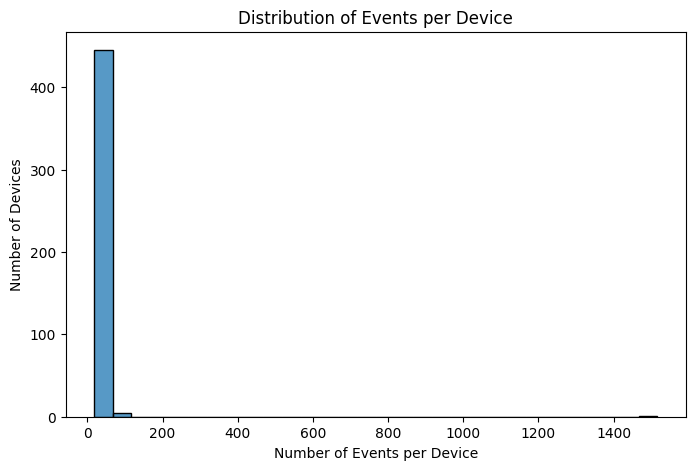

In [4]:
# Events per Device
events_per_device = (
    df.groupby('device_id')  # group by device_id
      .size()                # count events (rows) in each group (device)
      .reset_index(name='event_count')  # index for Y
      .sort_values('event_count', ascending=False)  # sort a-z
)

# draw
plt.figure(figsize=(8,5))
sns.histplot(events_per_device['event_count'], bins=30)
plt.title('Distribution of Events per Device')
plt.xlabel('Number of Events per Device')
plt.ylabel('Number of Devices')
plt.show()

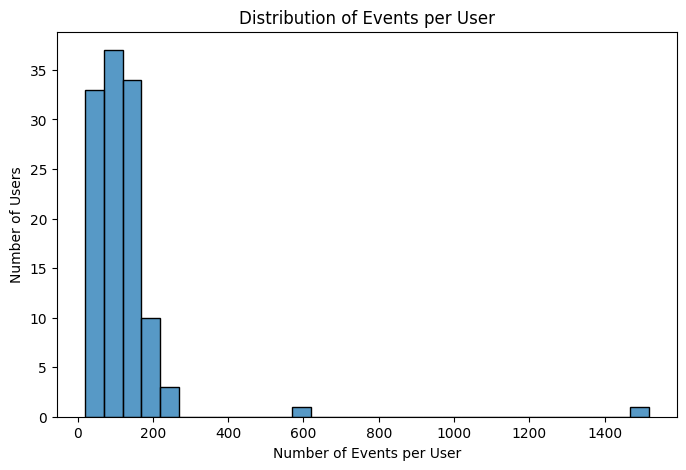

In [5]:
# Events per User
events_per_user = (
    df.groupby('user_id')
      .size()
      .reset_index(name='event_count')
      .sort_values('event_count', ascending=False)
)

# events_per_user.head()

plt.figure(figsize=(8,5))
sns.histplot(events_per_user['event_count'], bins=30)
plt.title('Distribution of Events per User')
plt.xlabel('Number of Events per User')
plt.ylabel('Number of Users')
plt.show()


In [6]:
# Comparison between Ayla vs Tuya devices.

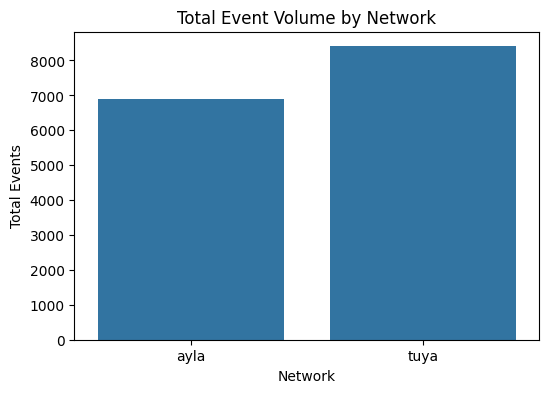

In [7]:
# Total events by networks
events_by_network = (
    df.groupby('network')
      .size()
      .reset_index(name='event_count')
)

plt.figure(figsize=(6,4))
sns.barplot(data=events_by_network, x='network', y='event_count')

plt.title('Total Event Volume by Network')
plt.xlabel('Network')
plt.ylabel('Total Events')
plt.show()


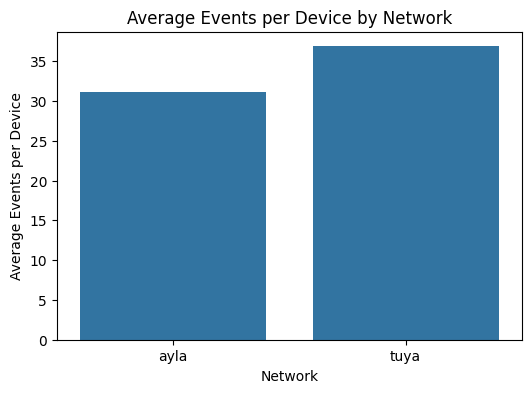

In [8]:
# average events per device by network
avg_events_per_device = (
    df.groupby(['network', 'device_id'])
      .size()
      .reset_index(name='event_count')
      .groupby('network')['event_count'].mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_events_per_device, x='network', y='event_count')

plt.title('Average Events per Device by Network')
plt.xlabel('Network')
plt.ylabel('Average Events per Device')
plt.show()


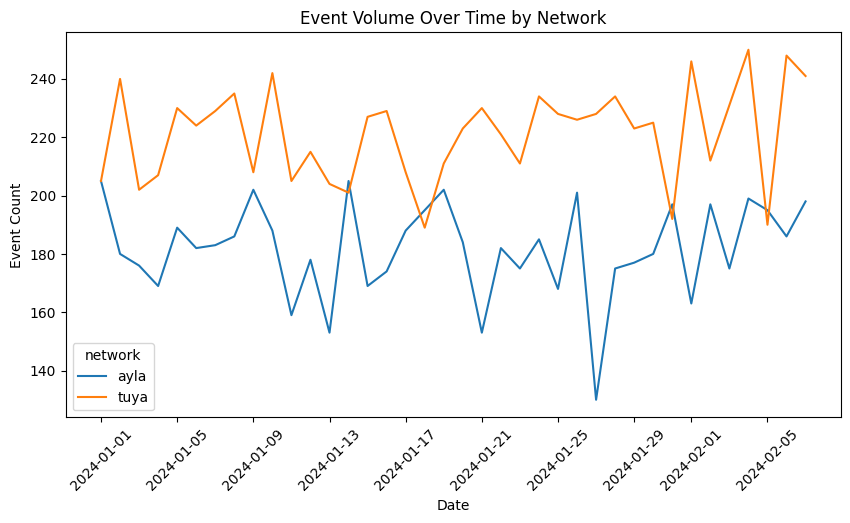

In [9]:
# events over date by network
events_time_network = (
    df.groupby([df['event_ts'].dt.date, 'network'])
      .size()
      .reset_index(name='event_count')
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=events_time_network,
    x='event_ts',
    y='event_count',
    hue='network'
)

plt.title('Event Volume Over Time by Network')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()

# Task 4 – Hypotheses & Questions

1. Propose 2–3 hypotheses about user or device behavior.
2. Show how you would test each hypothesis with the available data.
3. Clearly state whether the data supports, partially supports, or does not support the hypothesis.

In [10]:
# Your code for hypothesis testing here

# Task 5 – Reflection

- What additional data would improve this analysis?
- What limitations prevent deeper insights?
- What would you explore next if this were Phase 0 of a larger project?

*Write your reflection here...*